<img src="./logo_UTN.svg" align="right" width="200" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 9

#### Ana Nuñez



# Consigna

Síntesis de funciones de excitación

1) Sea la función:

    $ Z(s) = \frac{(s2+3)(s2+1)}{s(s2+2)} $

    Se pide hallar la topología circuital y los valores de los componentes para:

    a) Síntesis de Z(s) mediante el método de Foster en su versión  "paralelo" o "derivación".

    b) Idem a) mediante Cauer 1 y 2.

2) Sea 

    $ Y(s) = \frac{3s(s2+7/3)}{(s2+2)(s2+5)} $

    Obtenga los valores de los componentes de la siguiente red sabiendo que L2 y C2 resuenan a 1 r/s.

    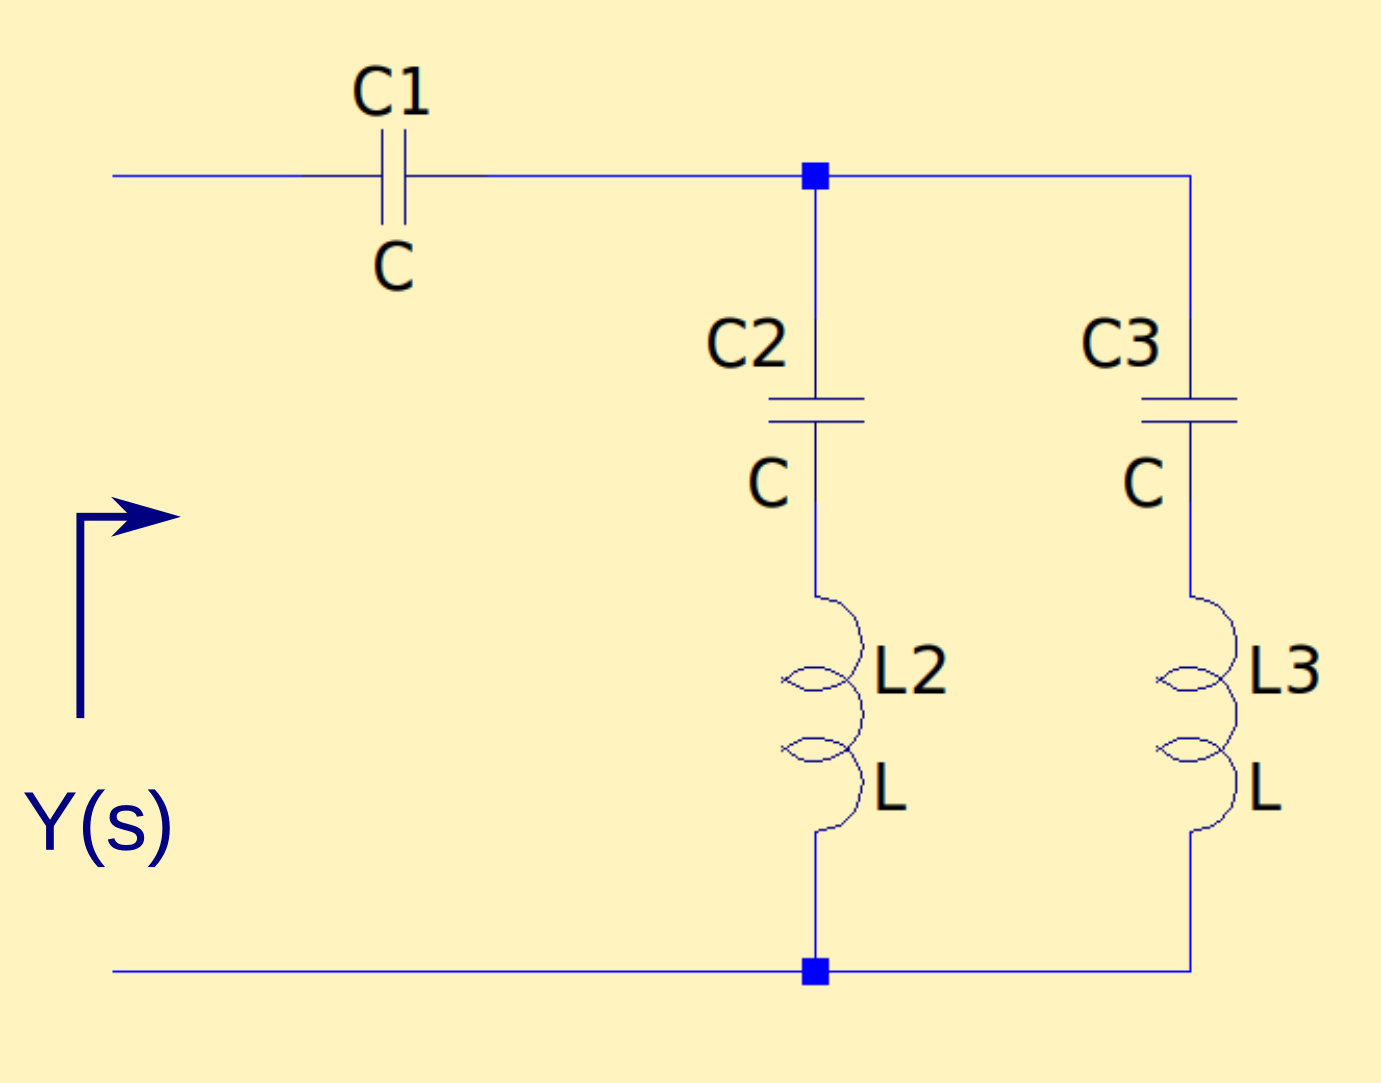

# Desarrollo analítico


In [1]:

from IPython.display import IFrame
IFrame("./TS7.pdf", width=1000, height=1000)